In [6]:
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [7]:
# open image using PIL Image.open(), and split bands into seperate PIL image objects
# Then convert each band into a numpy array for analysis
src_image = '/Users/alexrojas/Documents/Data/NewYork/Imagery/m_4007307_se_18_1_20170809/porpoise_channel.tif'
pil_image = Image.open(src_image)

# Split bands into seperate PIL image objects
r_pil, g_pil, b_pil, nir_pil = Image.Image.split(pil_image)

# Convert each band into a numpy array
r_array = np.array(r_pil)
g_array = np.array(g_pil)
b_array = np.array(b_pil)
nir_array = np.array(nir_pil)

# Create a RGB composite
rgb_array = np.dstack((r_array, g_array, b_array))

# Create a NIR-R-G composite
nir_rg_array = np.dstack((nir_array, r_array, g_array))

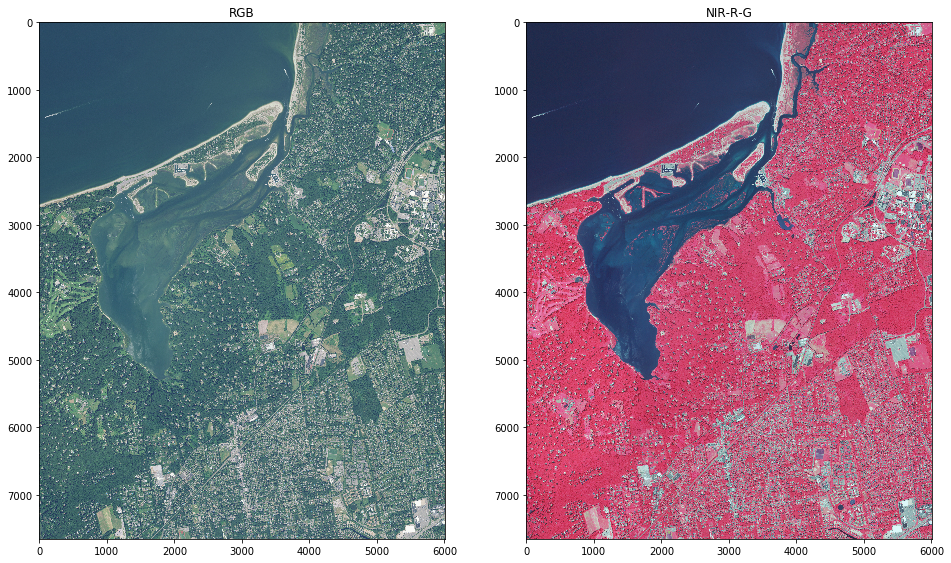

In [8]:
# Display RGB and NIR-R-G for visualization purposes

fig=plt.figure(figsize=(16,12))

# display rgb
a = fig.add_subplot(1,2,1)
rgb_plot = plt.imshow(rgb_array)
a.set_title('RGB')

# display nir-r-g
a = fig.add_subplot(1,2,2)
nirrg_plot = plt.imshow(nir_rg_array)
a.set_title('NIR-R-G')

plt.show()

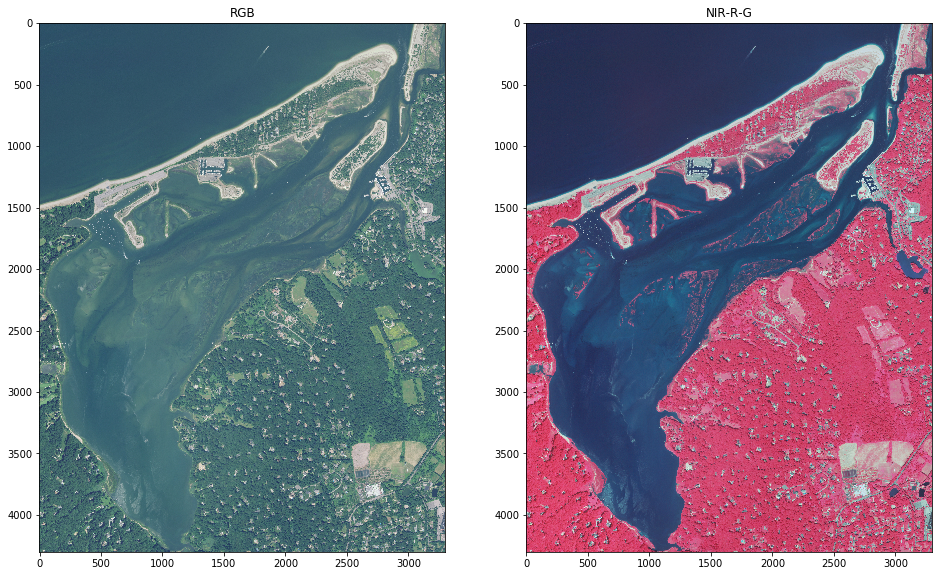

In [9]:
# Display clipped RGB and NIR-R-G for visualization purposes (porpoise channel)

rgb_porp = rgb_array[1000:5300,700:4000,:]
nir_porp = nir_rg_array[1000:5300,700:4000, :]

fig=plt.figure(figsize=(16,12))

# display rgb
a = fig.add_subplot(1,2,1)
rgb_plot = plt.imshow(rgb_porp)
a.set_title('RGB')

# display nir-r-g
a = fig.add_subplot(1,2,2)
nirrg_plot = plt.imshow(nir_porp)
a.set_title('NIR-R-G')

plt.show()

//anaconda3/lib/python3.7/site-packages/skimage/exposure/exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


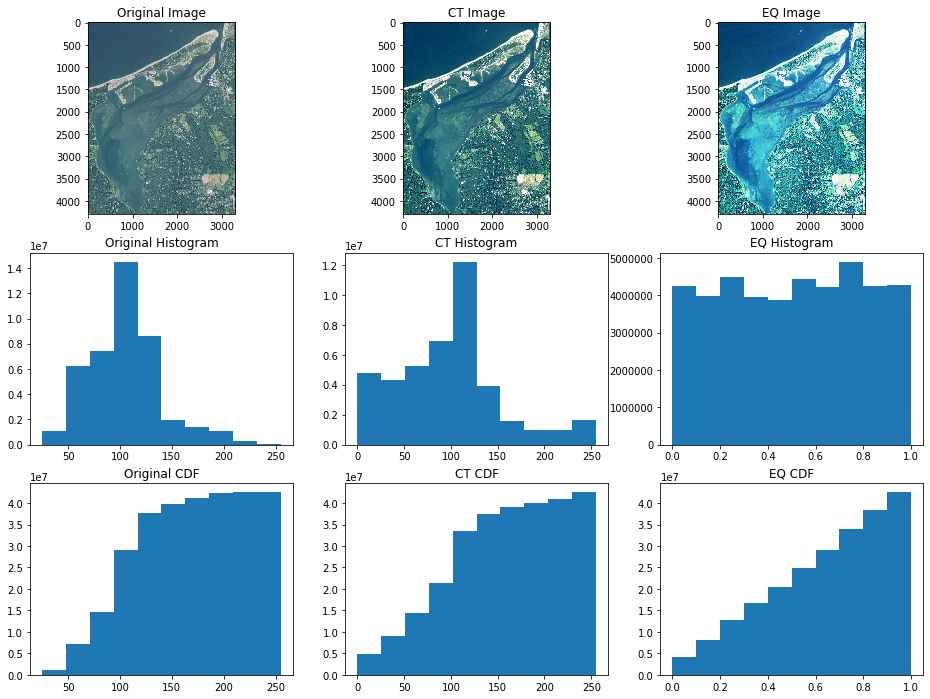

In [19]:
from skimage import exposure

# for contrast stretching, get the 2nd and 98th percentile using the np.percentile method
p2 = np.percentile(rgb_porp, 2)
p98 = np.percentile(rgb_porp, 98)

# Contrast stretching
image_ct = exposure.rescale_intensity(rgb_porp, in_range=(p2,p98))

# Equalize histogram
image_eq = exposure.equalize_hist(rgb_porp)

# Set up plot size to display all figures
fig=plt.figure(figsize=(16,12))

## Image subplots ##

# Subplot for original image
a = fig.add_subplot(3,3,1)
img_plt = plt.imshow(rgb_porp)
a.set_title('Original Image')

# Subplot for contrast stretched image
a = fig.add_subplot(3,3,2)
img_plt = plt.imshow(image_ct)
a.set_title('CT Image')

# Subplot for histogram equalized image
a = fig.add_subplot(3,3,3)
img_plt = plt.imshow(image_eq)
a.set_title('EQ Image')

## Histogram subplots ##

# Original image histogram subplot
a = fig.add_subplot(3,3,4)
hist_plt = plt.hist(rgb_porp.ravel())
a.set_title('Original Histogram')

# CT image histogram subplot
a = fig.add_subplot(3,3,5)
hist_plt = plt.hist(image_ct.ravel())
a.set_title('CT Histogram')

# EQ image histogram subplot
a = fig.add_subplot(3,3,6)
hist_plt = plt.hist(image_eq.ravel())
a.set_title('EQ Histogram')

## CDF subplots ##

# Original image CDF subplot
a = fig.add_subplot(3,3,7)
hist_plt = plt.hist(rgb_porp.ravel(), cumulative=True)
a.set_title('Original CDF')

# CT image CDF subplot
a = fig.add_subplot(3,3,8)
hist_plt = plt.hist(image_ct.ravel(), cumulative=True)
a.set_title('CT CDF')

# EQ image CDF subplot
a = fig.add_subplot(3,3,9)
hist_plt = plt.hist(image_eq.ravel(), cumulative=True)
a.set_title('EQ CDF')

plt.show()

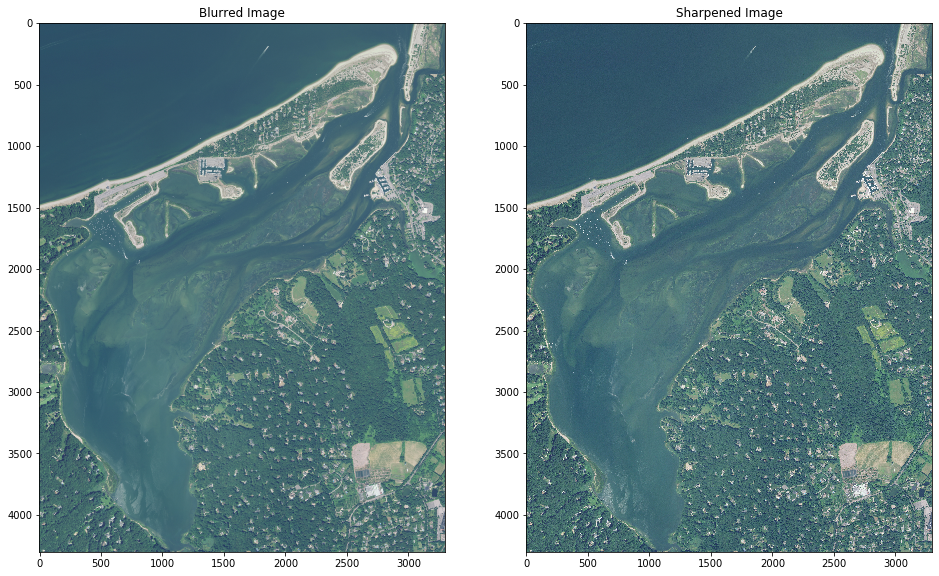

In [20]:
## Blurring and Sharpening of Images ##

# First, convert to PIL image to use PIL functions
from PIL import ImageFilter

rgb_porp_pil = Image.fromarray(rgb_porp)

# Create a blurred and a sharpened image using the image filter method
rgb_blur = rgb_porp_pil.filter(ImageFilter.BLUR)
rgb_sharp = rgb_porp_pil.filter(ImageFilter.SHARPEN)

## Display blurred and sharpened images using subplots ## 
fig = plt.figure(figsize=(16,12))

# Display blurred image
a = fig.add_subplot(1,2,1)
img_plt = plt.imshow(rgb_blur)
a.set_title('Blurred Image')

# Display sharpened image
a = fig.add_subplot(1,2,2)
img_plt = plt.imshow(rgb_sharp)
a.set_title('Sharpened Image')

plt.show()

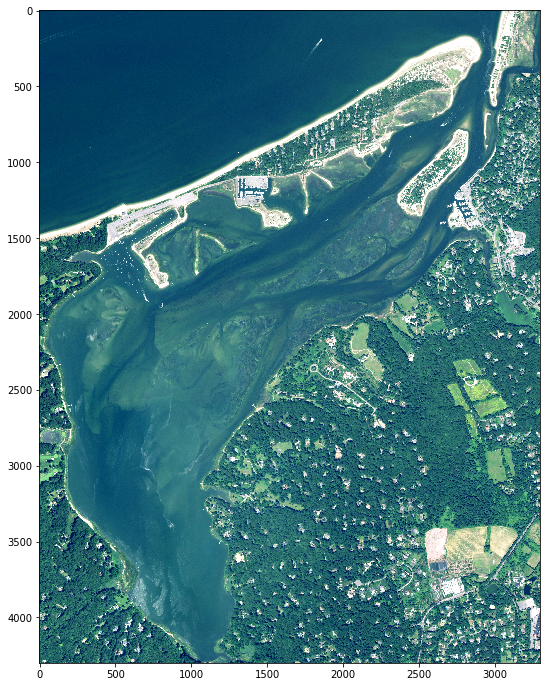

In [23]:
# Display the contrast stretch image
plt.figure(figsize=(16,12))
plt.imshow(image_ct)
plt.show()

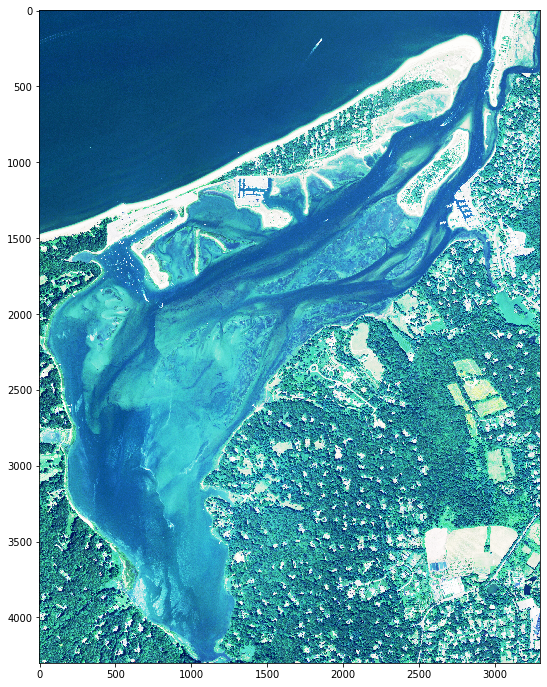

In [24]:
# Display the histogram equalized image
plt.figure(figsize=(16,12))
plt.imshow(image_eq)
plt.show()

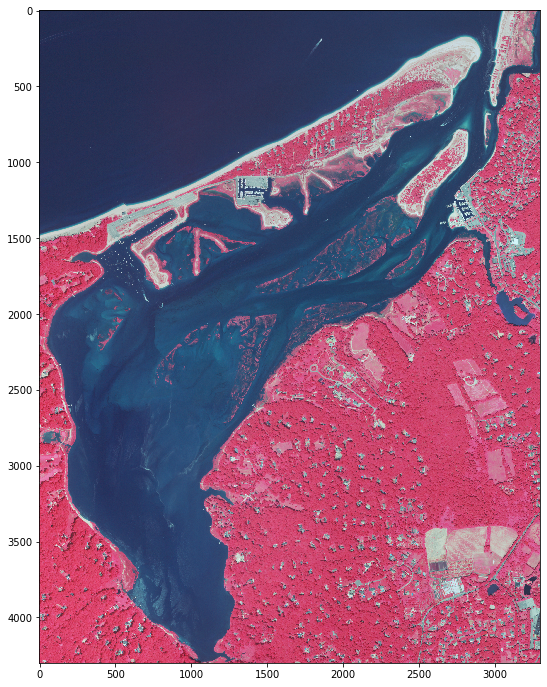

In [26]:
# Display the NIR-R-G image
plt.figure(figsize=(16,12))
plt.imshow(nir_porp)
plt.show()

(array([4753742., 1732108.,  207988.,  212006.,  278304.,  426446.,
         733226., 2741493., 3084826.,   19861.]),
 array([ 22. ,  45.1,  68.2,  91.3, 114.4, 137.5, 160.6, 183.7, 206.8,
        229.9, 253. ]),
 <a list of 10 Patch objects>)

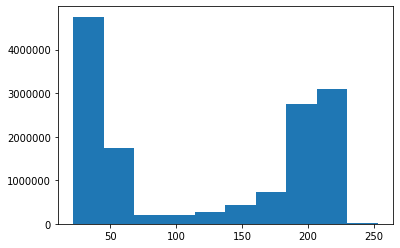

In [32]:
plt.hist(nir_porp[:,:,0].ravel())

Text(0.5, 1.0, 'NIR-R-G values greater than 150')

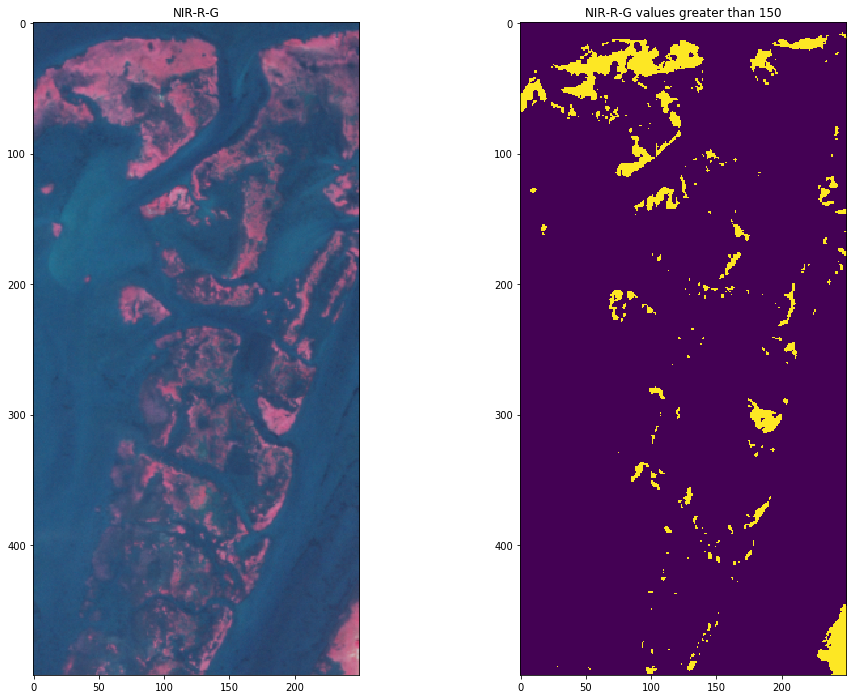

In [39]:
## Set up subplots
fig = plt.figure(figsize=(16,12))

# Add NIR-R-G clip of marsh
a = fig.add_subplot(1,2,1)
plt.imshow(nir_porp[2000:2500,1250:1500,:])
a.set_title('NIR-R-G')

# Add NIR-R-G clip of marsh with values greater than 150
a = fig.add_subplot(1,2,2)
plt.imshow(nir_porp[2000:2500,1250:1500,0]>150)
a.set_title('NIR-R-G values greater than 150')

In [54]:
## Sharpened NIR-R-G ##

# First, convert array to PIL image to use PIL functions
nir_porp_pil = Image.fromarray(nir_porp[2000:2500,1250:1500,:])
nir_sharp = nir_porp_pil.filter(ImageFilter.SHARPEN)
nir_sharp_array = np.array(nir_sharp)

Text(0.5, 1.0, 'NIR-R-G values greater than 150')

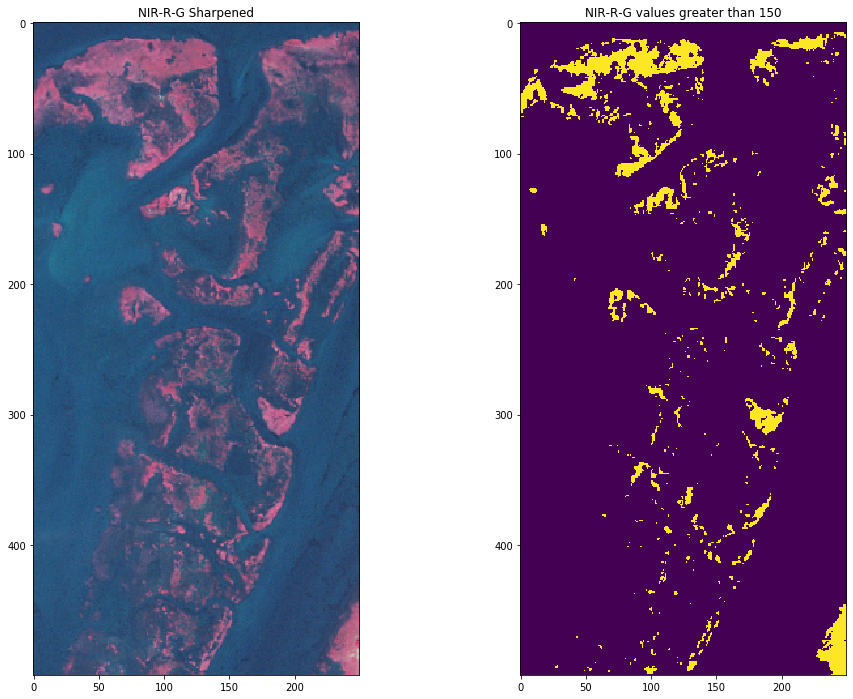

In [56]:
## Set up subplots ##
fig = plt.figure(figsize=(16,12))

# Add NIR-R-G clip of marsh
a = fig.add_subplot(1,2,1)
plt.imshow(nir_sharp_array)
a.set_title('NIR-R-G Sharpened')

# Add NIR-R-G clip of marsh with values greater than 150
a = fig.add_subplot(1,2,2)
plt.imshow(nir_sharp_array[:,:,0]>150)
a.set_title('NIR-R-G values greater than 150')

Text(0.5, 1.0, 'NIR-R-G values greater than 150')

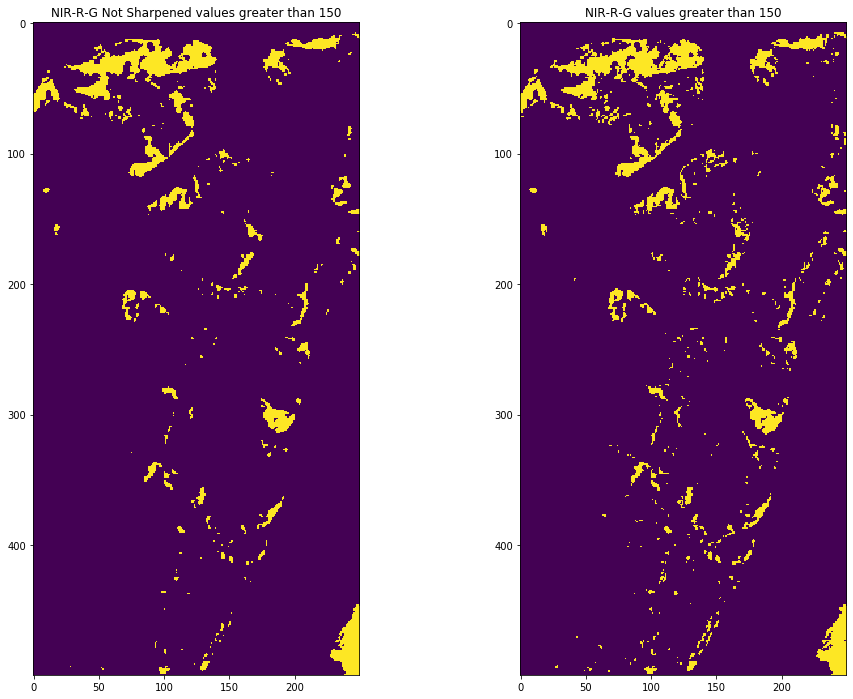

In [57]:
## Set up subplots ##
fig = plt.figure(figsize=(16,12))

# Add NIR-R-G clip of marsh
a = fig.add_subplot(1,2,1)
plt.imshow(nir_porp[2000:2500,1250:1500,0]>150)
a.set_title('NIR-R-G Not Sharpened values greater than 150')

# Add NIR-R-G clip of marsh with values greater than 150
a = fig.add_subplot(1,2,2)
plt.imshow(nir_sharp_array[:,:,0]>150)
a.set_title('NIR-R-G values greater than 150')